# Homework 3

## Problem 1: Logistic map, chaos, bifurcation

Consider the logic map

$$
  x_{n+1} = \alpha x_n (1-x_n)
$$

Write a program to calculates and displays the behavior of the logistic map.

* For a give value of $\alpha$, start with $x=0.5$ and iterate the logistic map equation a thousand times. 
  * That will give it a chance to settle down to a fixed point or limit cycle if its going to.

* Run for another thousand iterations and plot the points $(\alpha,x)$ on a graph where the horizontal axis is $\alpha$ and the vertical axis is $x$.

* Repeat the whole calculation for values of $\alpha$ from 1 to 4 in steps of 0.01, plotting the dots for all values of $\alpha$ on the same figure.

Reference: https://en.wikipedia.org/wiki/Logistic_map

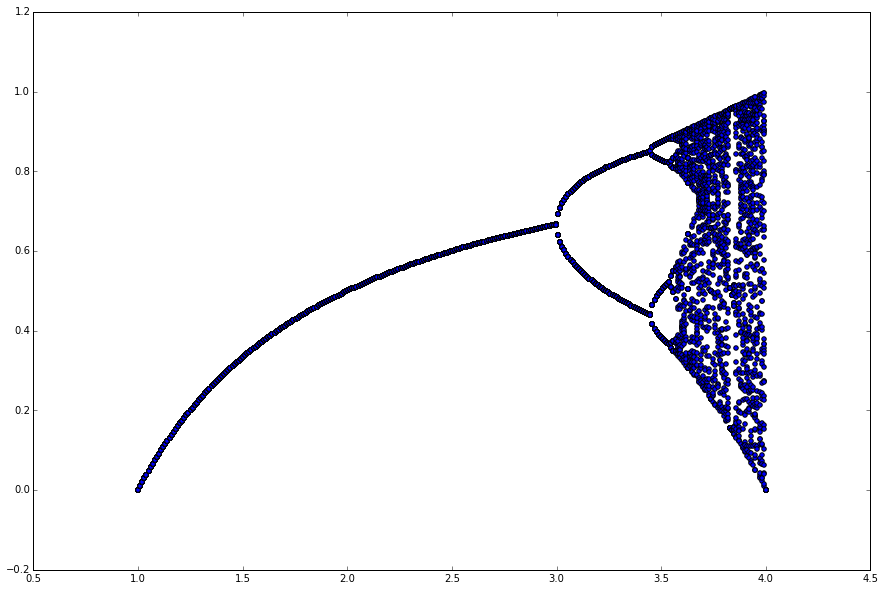

In [20]:
from pylab import *
def f(x,a):
    return a*x*(1-x)
spot = np.linspace(1, 4, 300)
x1=[]
a1=[]
      
for a in spot:
    x = 0.5
    for i in range(1000):
        x = f(x, a)
    for i in range(50):
        x = f(x, a)
        x1.append(x)
        a1.append(a)
   

figure(figsize=(15,10))
scatter(a1, x1)
show()

## Problem 2: The Mandelbrot set



Consider the equation
$$
  z^\prime=z^2+c,
$$
where $z$ is a complex number and $c$ is a complex constant.

For a given complex value of $c$, start with $z = 0$ and iterate repeatedly. 
If the magnitude $|z|$ of the resulting value is ever greater than $2$, 
then the point in the complex plane at position $c$ is not in the Mandelbrot set, 
otherwise it is in the set.

In principle, one has to iterate infinitely many times to prove that a point is in the Mandelbrot set.
In practice, however, one usually just performs some large number of iterations, 
say 100 or 1000, and if $|z|$ hasn't exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where $-2 \le x \le 2$ and $-2 \le y \le 2$. Make a **density plot** in which grid points inside the Mandelbrot set are colored black and those outside are colored white. 


Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$
(perhaps $N = 100$) so that your program runs quickly while you are testing it. 
Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

Instead of coloring points just black or white, color points according to the number of iterations of the equation before $z$ becomes greater than $2$ (or the maximum number of iterations if $|z|$ never becomes greater than 2). Use color schemes such as the `hot` or `jet` schemes. 

Or to color according to the logarithm of the number of iterations.

Reference: https://en.wikipedia.org/wiki/Mandelbrot_set

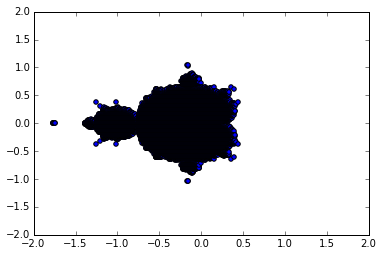

In [19]:
def f(x,y):
    c=x+1j*y
    z=0.0j
    for i in range(100):
        z=z*z+c
        if abs(z)>=2:
            return False
    return True
x=np.linspace(-2,2,500)
y=np.linspace(-2,2,500)

x1=[]
y1=[]
for i in x:
    for j in y:
        spot=f(i,j)
        if spot:
            x1.append(i)
            y1.append(j)

scatter(x1,y1)
xlim(-2,2)
ylim(-2,2)
show()

## Problem 3: Quadratic equations

### Problem 3.1

Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard ￼formula

$$
  x = \frac{-b\pm\sqrt{b^2-4ac}}{2a}.
$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [13]:
import math
a= float(raw_input('a='))
b= float(raw_input('b='))
c= float(raw_input('c='))
x1=(-b+math.sqrt(b*b-4*a*c)/(2*a))
x2=(-b-math.sqrt(b*b-4*a*c)/(2*a))
print x1,x2

a=0.001
b=1000
c=0.001
498999.999999 -500999.999999


### Problem 3.2

There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b\mp\sqrt{b^2-4ac}$, one can show that the solutions ￼can also be written as

$$
  x = \frac{2c}{-b\mp\sqrt{b^2-4ac}}.
$$

Write a program that takes as input three numbers, a, b, and c, and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using this formula. Use the program to solve $0.001x^2 + 1000x + 0.001 = 0$.

In [6]:
import math
a= float(raw_input('a='))
b= float(raw_input('b='))
c= float(raw_input('c='))
x3=2*c/(-b-math.sqrt(b*b-4*a*c))
x4=2*c/(-b+math.sqrt(b*b-4*a*c))
print x3,x4

a=0.001
b=1000
c=0.001
-1e-06 -1000010.57551


### Problem 3.3

The correct solutions to the quadratic equation $0.001x^2 + 1000x + 0.001 = 0$ should be

$$
  x_1 = -1.00000000000100002081668371*10^{-6}, \\
  x_2 = -9.99999999999000060986371202*10^{5}
$$

You should find out that one of the solutions is not very accurate for your code in problem 3.1 and 3.2. Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

## Problem 4: Numerical derivatives

The derivative of a functoin $f(x)$ is defined as

$$
  \frac{df}{dx} = \lim_{\delta\rightarrow 0} \frac{f(x+\delta)-f(x)}{\delta}.
$$

On the computer we can’t actually take the limit as $\delta$ goes to zero, but we can get a reasonable approximation just by making $\delta$ small.

### Problem 4.1

Write a program that defines a function $f(x)$ returning the value $x(x − 1)$, then calculates the derivative of the function at the point $x = 1$ using the formula above with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives.

In [23]:
def f(x):
    return x*(x-1)
sigma=1e-2
x=1.0
print (f(x+sigma)-f(x))/sigma

1.01


### Problem 4.2

Repeat the calculation for $\delta = 10^{−4}$ , $10^{−6}$ , $10^{−8}$ , $10^{−10}$ , $10^{−12}$ , and $10^{−14}$. You should see that the accuracy of the calculation initially gets better as δ gets smaller, but then gets worse again. Why is this?

In [25]:
def f(x):
    return x*(x-1)
sigma=1e-4
print (f(x+sigma)-f(x))/sigma
sigma=1e-6
print (f(x+sigma)-f(x))/sigma
sigma=1e-8
print (f(x+sigma)-f(x))/sigma
sigma=1e-10
print (f(x+sigma)-f(x))/sigma
sigma=1e-12
print (f(x+sigma)-f(x))/sigma
sigma=1e-14
print (f(x+sigma)-f(x))/sigma

1.0001
1.00000099992
1.00000000392
1.00000008284
1.00008890058
0.999200722163


### Problem 4.3

Plot the error of your numerical derivative a function of $\log(\delta)$, with $\delta \in [10^{-2}, 10^{-14}]$.

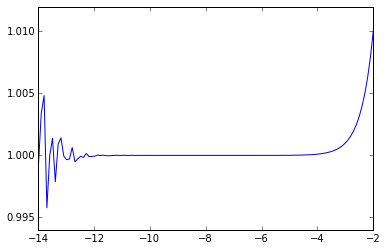

In [17]:
def g(x,sigma):
    return (f(x+sigma)-f(x))/sigma
    
sigma=np.linspace(-14,-2,120)
x=g(1.0,10**sigma)
plot(sigma,x)
show()